# Install and import libraries

In [ ]:
!pip install datasets

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 397, in resolve
    self._add_to_criteria(self.state.criteria, r, parent

In [ ]:
!pip install torchsummaryX==1.3.0 -q

In [ ]:
!pip install metrics

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.7/841.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for metrics: filename=metrics-0.3.3-py2.py3-none-any.whl size=17793 sha256=235385afe61e33dd9ec22be8c0309f4cec17cd96d4f61681646cf7ba990fc839
  Stored in directory: /root/.cache/pip/wheels/29/7a/e7/1175d9ff10607b8f02aa37c32392cb28cdda0aea8fcc2b514b
  Created wheel for pathspec: filename=pathspec-0.5.5-py3-none-any.whl size=24218 sha256=28449e24f646778bd51cb26e6e40da9a89c99cda3e5df580637a6754f3051a11
  Stored in directory: /root/.cache/pip/wheels/28/d4/11/01ccd690e97b06874998aa554a8b2610c361900d2a7e038300
Successfully built metrics pathspec
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.16.1
    Uninstalling Pygments-2.16.1:
      Successfully uninstalled Pygments-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This b

In [ ]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.2 which is incompatible.


In [ ]:
import pygments
pygments.__version__

'2.16.1'

In [ ]:
%cd '/content/oasis'

[Errno 2] No such file or directory: '/content/oasis'
/content


In [ ]:
!pip install transformers


%tensorflow_version 2.x
#!pip show tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# lib

In [1]:
import os
import datetime
import gc
import time
import string
import pickle
import numpy as np
import pandas as pd
from urllib.request import urlopen
from transformers import TFAutoModel, AutoTokenizer
from metrics import *
from torch.utils.data import Dataset
import torch
from torch.utils.data import DataLoader
from transformers import AutoModelForSequenceClassification
from transformers import get_scheduler
from tqdm.auto import tqdm
import evaluate
import datasets
from transformers import AutoTokenizer
from torchsummaryX import summary

import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

import os
import numpy as np
import random
import torch
import torch.nn as nn
from torch import Tensor
from typing import Tuple, Optional
from transformers import BertModel
from transformers import BertTokenizer

# config

In [21]:
experiment_params = {'task_name': 'oasis',
                    'experiment_name': 'bert_base_1',
                    'model_name': 'bert_base',
                    'training': True,
                    'testing': True,
                    'save_model': True,
                    'load_model': True,
                    'init_ckpt_file': 'bert-base-uncased',
                    'batch_size': 16,
                    'num_epochs': 50,
                    'evaluate_steps': 50,
                    'early_stopping': True,
                    'patience': 5,
                    'vocab_size': 1700,
                    'max_seq_length': 115,
                    'to_tokens': False,
                    'to_lower': True,
                    'use_punct': True,
                    'embedding_dim': 768, # bert_base/gpt2=768, bert_large=1024
                    'embedding_type': 'bert_base',
                    'embedding_source': 'bert_base',
                    'tokeniser_name': 'bert-base-uncased'}

model_params = {"learning_rate": 0.00002,
                "optimiser": "adam",
                "use_tpu": False,
                "num_fine_tune_layers": 12, # bert_base=12, bert_large=24, gpt2=None
                "output_mode": "sequence",
                "dropout_rate": 0.3,
                "dense_units": 128}

# Set experiment and model parameters

In [22]:
# Task and experiment name
task_name = experiment_params['task_name']
experiment_name = experiment_params['experiment_name']
model_name = experiment_params['model_name']
training = experiment_params['training']
testing = experiment_params['testing']
save_model = experiment_params['save_model']
load_model = experiment_params['load_model']
init_ckpt_file = experiment_params['init_ckpt_file']


# Data set and output paths
dataset_dir = os.path.join(task_name, 'dataset')
output_dir = os.path.join(task_name, experiment_name)
checkpoint_dir = os.path.join(output_dir, 'checkpoints')

# Create appropriate directories if they don't exist
for dir in [task_name, dataset_dir, output_dir, checkpoint_dir]:
    if not os.path.exists(dir):
        os.mkdir(dir)

print("------------------------------------")
print("Running experiment...")
print(task_name + ": " + experiment_name)
print("Training: " + str(training))
print("Testing: " + str(testing))

# Training parameters
batch_size = experiment_params['batch_size']
num_epochs = experiment_params['num_epochs']
evaluate_steps = experiment_params['evaluate_steps']
early_stopping = experiment_params['early_stopping']
patience = experiment_params['patience']
optimiser_type = model_params['optimiser']
learning_rate = model_params['learning_rate']

print("------------------------------------")
print("Using parameters...")
print("Batch size: " + str(batch_size))
print("Epochs: " + str(num_epochs))
print("Evaluate steps: " + str(evaluate_steps))
print("Early Stopping: " + str(early_stopping))
print("Patience: " + str(patience))
print("Optimiser: " + optimiser_type)
print("Learning rate: " + str(learning_rate))

------------------------------------
Running experiment...
oasis: bert_base_1
Training: True
Testing: True
------------------------------------
Using parameters...
Batch size: 16
Epochs: 50
Evaluate steps: 50
Early Stopping: True
Patience: 5
Optimiser: adam
Learning rate: 2e-05


# Dataset

In [23]:
# Data set parameters
vocab_size = experiment_params['vocab_size']
to_lower = experiment_params['to_lower']
use_punct = experiment_params['use_punct']


# Get the data from Github repo
if task_name == 'swda':
    base_url = 'https://raw.github.com/NathanDuran/Switchboard-Corpus/master/swda_data/'
elif task_name == 'maptask':
    base_url = 'https://raw.github.com/NathanDuran/Maptask-Corpus/master/maptask_data/'
elif task_name == 'oasis':
    base_url = 'https://raw.githubusercontent.com/NathanDuran/BT-Oasis-Corpus/master/oasis_data/'

metadata = pickle.load(urlopen(base_url + 'metadata/metadata.pkl'))
all_labels = metadata['labels']
vocab = metadata['vocabulary'][:vocab_size]

def get_dataset(url, set_name, all_labels):
  train_split = urlopen(url + 'metadata/'+set_name+'_split.txt')
  texts, labels = [], []
  for i in train_split:
    dialog = i.decode('utf-8').rstrip('\r\n')+'.txt'
    input_text, output_labels = [], []
    for line in (urlopen(url + set_name+ '/' + dialog)):
      sentence = line.decode('utf-8').rstrip('\r\n').split("|")[1]
      label = line.decode('utf-8').rstrip('\r\n').split("|")[2]

      input_text.append(sentence)
      output_labels.append(all_labels.index(label))
    texts.append(input_text)
    labels.append(output_labels)
  return texts, labels

In [24]:
train_texts, train_labels = get_dataset(base_url, 'train', all_labels)
val_texts, val_labels = get_dataset(base_url, 'val', all_labels)
test_texts, test_labels = get_dataset(base_url, 'test', all_labels)

In [68]:
train_texts[0]

['hello',
 'yes',
 'could i have a number for please',
 'are you',
 'oh you need directory enquiries on would you like me to connect you thank you',
 'would you like me to connect you',
 'yes please',
 'thank you',
 'sorry about that']

In [60]:
len(train_texts)

508

# tokenizer

In [25]:
max_length = 30

In [26]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False, model_max_length=max_length)

In [27]:
def token(texts, labels):
  input_ids, attention_masks = [], []
  for text in tqdm(texts):
      encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
      input_ids.append(encoded_input['input_ids'])
      attention_masks.append(encoded_input['attention_mask'])
  for i in range(len(input_ids)):
      if input_ids[i].size(1) < max_length:
          padding_shape = (input_ids[i].size(0), max_length - input_ids[i].size(1))
          input_ids[i] = torch.cat((input_ids[i], torch.zeros(padding_shape)), axis=1)
          attention_masks[i] = torch.cat((attention_masks[i], torch.zeros(padding_shape)), axis=1)
  dialogue_lengths = [len(dialogue) for dialogue in input_ids]
  dialogue_lengths = torch.LongTensor(dialogue_lengths)

  input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True)
  attention_masks = torch.nn.utils.rnn.pad_sequence(attention_masks, batch_first=True)

  labels = [torch.LongTensor(label) for label in labels]
  y = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True)
  return dialogue_lengths, input_ids.type(torch.LongTensor), attention_masks.type(torch.LongTensor), y

In [28]:
dialogue_lengths_tr, input_ids_tr, attention_masks_tr, y_tr= token(train_texts, train_labels)
dialogue_lengths_v, input_ids_v, attention_masks_v, y_v= token(val_texts, val_labels )
dialogue_lengths_t, input_ids_t, attention_masks_t, y_t= token(test_texts, test_labels)

  0%|          | 0/508 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

In [29]:
dialogue_lengths_tr.shape, input_ids_tr.shape, attention_masks_tr.shape, y_tr.shape

(torch.Size([508]),
 torch.Size([508, 153, 30]),
 torch.Size([508, 153, 30]),
 torch.Size([508, 153]))

# data loader

In [30]:
class BertDataset(Dataset):
    def __init__(self, input_ids, attention_masks, input_lengths, y):
        super().__init__()
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.input_lengths = input_lengths
        self.y = y

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_masks': self.attention_masks[idx],
            'input_lengths': self.input_lengths[idx],
            'labels': self.y[idx],
        }

    def __len__(self):
        return len(self.input_ids)


In [31]:
train_set = BertDataset(input_ids_tr, attention_masks_tr, dialogue_lengths_tr,  y_tr)
valid_set = BertDataset(input_ids_v, attention_masks_v, dialogue_lengths_v, y_v)
test_set = BertDataset(input_ids_t, attention_masks_t, dialogue_lengths_t, y_t)

In [32]:
train_set[0]

{'input_ids': tensor([[  101, 19082,   102,  ...,     0,     0,     0],
         [  101,  4208,   102,  ...,     0,     0,     0],
         [  101,  1180,   178,  ...,     0,     0,     0],
         ...,
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]]),
 'attention_masks': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'input_lengths': tensor(9),
 'labels': tensor([ 7,  5,  2,  2,  0, 17,  8,  6, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         

In [33]:
batch_size = 16

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Build the model

In [10]:
class DialogueRNN(nn.Module):
    """
    Inputs:
        - utterance_embs (batch_size, dialogue_len, input_size): utterance embeddings
    Returns:
        - preds (batch_size, dialogue_len, output_size): predictions, logits for each utterance
    """
    def __init__(self, input_size=300, output_size=10, rnn_hidden_size=64, use_layer_norm=True):
        super().__init__()

        self.rnn = nn.GRU(input_size, rnn_hidden_size, batch_first=True, bidirectional=False)

        self.use_layer_norm = use_layer_norm
        self.norm = nn.LayerNorm([rnn_hidden_size])

        self.head = nn.Sequential(
            nn.Linear(rnn_hidden_size, rnn_hidden_size),
            nn.ReLU(),
            nn.Linear(rnn_hidden_size, output_size),
        )

    def forward(self, utterance_embs):
        rnn_output, _ = self.rnn(utterance_embs)

        if self.use_layer_norm:
            rnn_output = self.norm(rnn_output)

        preds = self.head(rnn_output)
        return preds


In [11]:
class BertEmbedder(nn.Module):
    """
    Inputs:
        - input_ids (batch_size, dialogue_len, max_utterance_len): input token ids
        - attention_masks (batch_size, dialogue_len, max_utterance_len): Bert attention masks
    Returns:
        - outputs (batch_size, dialogue_len, 768): Bert embeddings for each utterance
    """
    def __init__(self, bert_layers_to_finetune=0, max_utterance_len=25):
        super().__init__()

        self.max_utterance_len = max_utterance_len
        self.bert = BertModel.from_pretrained('bert-base-cased')

        for param in self.bert.parameters():
            param.requires_grad = False

        if bert_layers_to_finetune:
            for param in self.bert.encoder.layer[-bert_layers_to_finetune:].parameters():
                param.requires_grad = True

    def forward(self, input_ids, attention_masks):
        batch_size, seq_len = input_ids.size(0), input_ids.size(1)

        # Get Bert utterance embeddings
        bert_output = self.bert(
            input_ids=input_ids.reshape(-1, self.max_utterance_len),
            attention_mask=attention_masks.reshape(-1, self.max_utterance_len)
        ).last_hidden_state
        attention_masks = attention_masks.reshape(-1, self.max_utterance_len, 1)
        bert_output = (bert_output * attention_masks).sum(dim=1) / (attention_masks.sum(dim=1) + 1e-5)
        bert_output = bert_output.view(batch_size, seq_len, -1)

        return bert_output

    def freeze_bert(self):
        for param in self.bert.parameters():
            param.requires_grad = False


In [12]:
class DialogueNetBert(nn.Module):
    """
    Inputs:
        - input_ids (batch_size, dialogue_len, max_utterance_len): input token ids
        - attention_masks (batch_size, dialogue_len, max_utterance_len): Bert attention masks
        - input_lengths: ignored
        - labels: ignored
    Returns:
        - outputs (batch_size, dialogue_len, output_size): predictions, logits for each utterance
    """
    def __init__(self, input_size=100, output_size=10, rnn_hidden_size=64, bert_layers_to_finetune=0,
                 use_layer_norm=True, max_utterance_len=25):
        super().__init__()

        self.bert_embedder = BertEmbedder(bert_layers_to_finetune=bert_layers_to_finetune, max_utterance_len=max_utterance_len)

        self.dialogue_rnn = DialogueRNN(input_size=768, output_size=output_size, rnn_hidden_size=rnn_hidden_size,
                                        use_layer_norm=use_layer_norm)

    def forward(self, input_ids, attention_masks, input_lengths=None, labels=None):
        bert_embs = self.bert_embedder(input_ids, attention_masks)
        outputs = self.dialogue_rnn(bert_embs)
        return outputs


In [13]:
model = DialogueNetBert(
    input_size=768,
    output_size=42,
    rnn_hidden_size=128,
    use_layer_norm=True,
    max_utterance_len=max_length,
    bert_layers_to_finetune=2,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [14]:
  optimizer = optim.Adam(model.parameters(), lr=0.001)

# train

In [ ]:
epoch_model_path = './checkpoint_epoch.pth'#TODO set the model path( Optional, you can just store best one. Make sure to make the changes below )
best_model_path = './checkpoint_best.pth'#TODO set best model path

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

device = 'cuda' if torch.cuda.is_available() else 'cpu'

def masking(preds, labels, input_lengths):
    """Mask sequences of various lengths before applying CrossEntropy Loss."""
    batch_size, seq_len = preds.size(0), preds.size(1)
    indexes = torch.arange(0, seq_len).expand(batch_size, seq_len)
    mask = indexes < input_lengths.view(-1, 1)
    mask = mask.to(device)
    return preds[mask].view(-1, preds.size(2)), labels[mask].view(-1).long()


def train_epoch(net, train_loader, optimizer, criterion):
    net.train()
    losses = []
    for batch in train_loader:
        for k, v in batch.items():
            if k != 'input_lengths':
                batch[k] = v.to(device)
        optimizer.zero_grad()
        outputs = net(**batch)
        masked_preds, masked_labels = masking(outputs, batch['labels'], batch['input_lengths'])
        loss = criterion(masked_preds, masked_labels)
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(net.parameters(), 1.0)
        optimizer.step()
        losses.append(loss.item())
    return losses


def val_epoch(net, valid_loader, criterion):
    net.eval()
    losses = []
    all_labels, all_preds = [], []
    for batch in valid_loader:
        for k, v in batch.items():
            if k != 'input_lengths':
                batch[k] = v.to(device)
        with torch.no_grad():
            outputs = net(**batch)
        masked_preds, masked_labels = masking(outputs, batch['labels'], batch['input_lengths'])
        loss = criterion(masked_preds, masked_labels)
        losses.append(loss.item())
        all_labels.append(masked_labels.detach().cpu().numpy())
        all_preds.append(torch.max(masked_preds.data, 1)[1].detach().cpu().numpy())

    all_labels = np.concatenate(all_labels)
    all_preds = np.concatenate(all_preds)
    f1 = f1_score(all_labels, all_preds, average='micro')
    acc = accuracy_score(all_labels, all_preds)
    p = precision_score(all_labels, all_preds, average='micro')
    r = recall_score(all_labels, all_preds, average='micro')

    return losses, f1, acc, p, r

def save_model(model, optimizer, scheduler, metric, epoch, path):
    torch.save(
        {'model_state_dict'         : model.state_dict(),
         'optimizer_state_dict'     : optimizer.state_dict(),
         'scheduler_state_dict'     : scheduler.state_dict(),
         metric[0]                  : metric[1],
         'epoch'                    : epoch},
         path
    )

def train_model(net, train_loader, valid_loader, test_loader, optimizer, bert_finetuning_epochs=3, n_epochs=10,
                verbose=False, plot=False):
    net.to(device)

    criterion = nn.CrossEntropyLoss()

    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor=0.3, patience=2, min_lr=1e-6, verbose=verbose)

    best_score = 0
    epochs_without_improvement = 0
    all_train_losses, all_val_losses, all_scores = [], [], []

    for epoch in range(n_epochs):
        if bert_finetuning_epochs and epoch == bert_finetuning_epochs:  # freeze Bert weights after n epochs
            net.bert_embedder.freeze_bert()

        # Train
        losses = train_epoch(net, train_loader, optimizer, criterion)
        all_train_losses += losses
        if verbose:
            print(f'[EPOCH {epoch}] Train loss: {np.mean(losses)}')

        # Val
        losses, f1_val, acc_val, p_val, r_val = val_epoch(net, valid_loader, criterion)
        all_val_losses.append(np.mean(losses))
        scheduler.step(np.mean(losses))
        all_scores.append(f1_val)
        if verbose:
            print(f'[EPOCH {epoch}] Val loss: {np.mean(losses)}, F1-score: {f1_val}, Accuracy: {acc_val}, Precision: {p_val}, Recall: {r_val}')

        save_model(model, optimizer, scheduler, ['f1_val', f1_val], epoch, epoch_model_path)
        print("Saved epoch model")

        # Early stopping
        if f1_val > best_score:
            best_score = f1_val
            save_model(model, optimizer, scheduler, ['f1_val', f1_val], epoch, best_model_path)
            epochs_without_improvement = 0
            print("Saved best model")
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= 5:
                print("Early stopping")
                break


    if plot:
        steps_per_epoch = len(train_loader) * train_loader.batch_size // train_loader.batch_size + 1
        _, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
        ax1.plot(all_train_losses, label='train_loss')
        ax1.plot(steps_per_epoch * np.arange(len(all_val_losses)), all_val_losses, marker='o', label='val_loss')
        ax1.set_xticks(steps_per_epoch * np.arange(len(all_val_losses)))
        ax1.set_xticklabels(np.arange(len(all_val_losses)))
        ax2.plot(all_scores, label='F1', marker='o')
        ax1.legend()
        ax2.legend()
        plt.show()


[EPOCH 0] Train loss: 1.2399718649685383
[EPOCH 0] Val loss: 1.1915227770805359, F1-score: 0.6577896138482024, Accuracy: 0.6577896138482024, Precision: 0.6577896138482024, Recall: 0.6577896138482024
Saved epoch model
Saved best model
[EPOCH 1] Train loss: 1.0168617982417345
[EPOCH 1] Val loss: 1.13275146484375, F1-score: 0.6830892143808256, Accuracy: 0.6830892143808256, Precision: 0.6830892143808256, Recall: 0.6830892143808256
Saved epoch model
Saved best model
[EPOCH 2] Train loss: 0.8733573313802481
[EPOCH 2] Val loss: 1.0544168800115585, F1-score: 0.6857523302263648, Accuracy: 0.6857523302263648, Precision: 0.6857523302263648, Recall: 0.6857523302263648
Saved epoch model
Saved best model
[EPOCH 3] Train loss: 0.7734714690595865
[EPOCH 3] Val loss: 0.9890319108963013, F1-score: 0.7057256990679095, Accuracy: 0.7057256990679095, Precision: 0.7057256990679095, Recall: 0.7057256990679095
Saved epoch model
Saved best model
[EPOCH 4] Train loss: 0.6839219611138105
[EPOCH 4] Val loss: 0.993

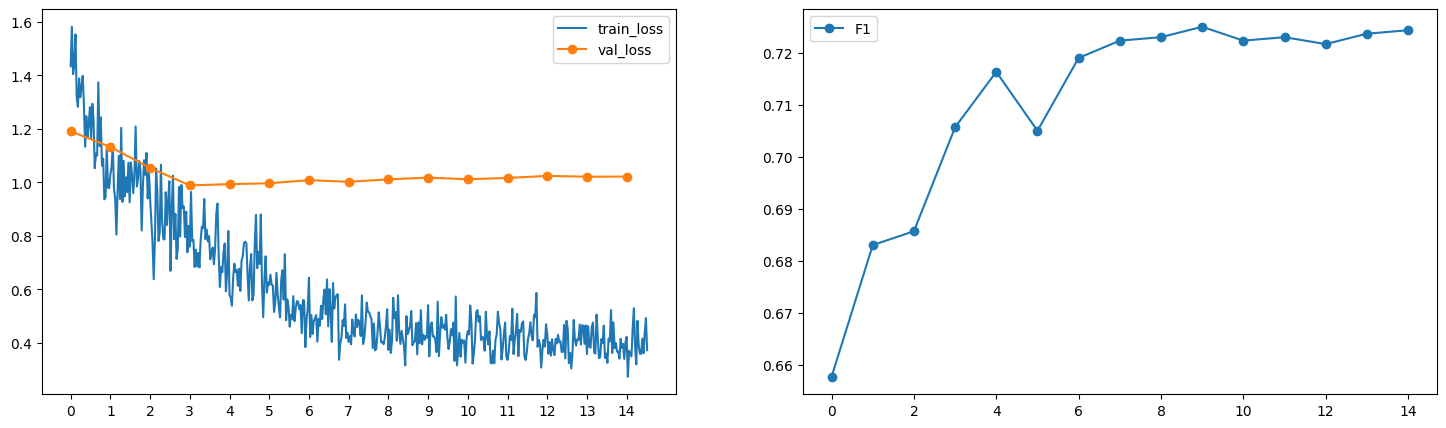

In [ ]:
train_model(model, train_loader, valid_loader, test_loader, optimizer,
            bert_finetuning_epochs=5, n_epochs=100, verbose=True, plot=True)

# test

In [100]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
m =  DialogueNetBert(
    input_size=768,
    output_size=42,
    rnn_hidden_size=128,
    use_layer_norm=True,
    max_utterance_len=max_length,
    bert_layers_to_finetune=2,
).to(device)
checkpoint = torch.load('/content/checkpoint_best.pth')
m.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [123]:
test_d = pd.read_csv('/content/cba6745b-33df-4d20-83e7-59156af951b3.csv')

In [47]:
test_text = list(test_d['Utterance'])

In [71]:
test_text = [test_text]

In [90]:
input_ids, attention_masks = [], []
for text in tqdm(test_text):
  encoded_input = tokenizer(text, padding=True, truncation=True, return_tensors='pt')
  input_ids.append(encoded_input['input_ids'])
  attention_masks.append(encoded_input['attention_mask'])

for i in range(len(input_ids)):
      if input_ids[i].size(1) < max_length:
          padding_shape = (input_ids[i].size(0), max_length - input_ids[i].size(1))
          input_ids[i] = torch.cat((input_ids[i], torch.zeros(padding_shape)), axis=1)
          attention_masks[i] = torch.cat((attention_masks[i], torch.zeros(padding_shape)), axis=1)

dialogue_lengths = [len(dialogue) for dialogue in input_ids]
dialogue_lengths = torch.LongTensor(dialogue_lengths)

input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True)
attention_masks = torch.nn.utils.rnn.pad_sequence(attention_masks, batch_first=True)


  0%|          | 0/1 [00:00<?, ?it/s]

564
564
tensor([564])
564
564


In [91]:
dialogue_lengths_t, input_ids_t, attention_masks_t = dialogue_lengths, input_ids, attention_masks

In [93]:
class testDataset(Dataset):
    def __init__(self, input_ids, attention_masks, input_lengths):
        super().__init__()
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.input_lengths = input_lengths

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_masks': self.attention_masks[idx],
            'input_lengths': self.input_lengths[idx],
        }

    def __len__(self):
        return len(self.input_ids)

test_set = testDataset(input_ids_t, attention_masks_t, dialogue_lengths_t)

In [96]:
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [103]:
results = []
m.eval()
i=0
print("Testing")
for data in tqdm(test_loader):
    i+=1
    input_ids_t, attention_masks_t, dialogue_lengths_t   = data

    with torch.no_grad():
        outputs = m(**batch)

    results.extend(outputs)

Testing


  0%|          | 0/1 [00:00<?, ?it/s]

In [140]:
map = metadata['label_freq'][['Labels','Dialogue Act']]
map = pd.Series(map['Dialogue Act'].values, index=map.Labels).to_dict()

In [141]:
test_d['DA'] = [map[j] for j in [all_labels[i] for i in torch.max(results[0], 1).indices]]

In [144]:
test_d.to_csv('cba6745b-33df-4d20-83e7-59156af951b3_da.csv')